In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns

1. Parse the file using regular expressions and write all ftp links from there into the ftps file

In [3]:
!wget https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references

--2022-12-11 03:19:39--  https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/references
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 1206044 (1,1M) [text/plain]
Сохранение в: «references»

references          100%[===================>]   1,15M  1,48MB/s    за 0,8s    

2022-12-11 03:19:41 (1,48 MB/s) - «references» сохранён [1206044/1206044]



In [2]:
with open('../HW6_RegExpression/references') as references:
    total = references.read()
    regexp1 = re.compile('ftp\.[./#\w]*')
    ftp = regexp1.findall(total)
    with open('../HW6_RegExpression/ftps', 'w') as ftps:
        print(ftp, file=ftps, sep = '\n')

2. Extract all the numbers from the story 2430 A.D.

In [10]:
!wget https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD

--2022-12-11 03:25:17--  https://raw.githubusercontent.com/Serfentum/bf_course/master/15.re/2430AD
Распознаётся raw.githubusercontent.com (raw.githubusercontent.com)… 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Подключение к raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... соединение установлено.
HTTP-запрос отправлен. Ожидание ответа… 200 OK
Длина: 16759 (16K) [text/plain]
Сохранение в: «2430AD»

2430AD              100%[===================>]  16,37K  --.-KB/s    за 0s      

2022-12-11 03:25:17 (38,8 MB/s) - «2430AD» сохранён [16759/16759]



In [3]:
with open('../HW6_RegExpression/2430AD') as story:
    total = story.read()
    regexp2 = re.compile('\d{1,}\S\d{1,}|\d{1,}')
    print(regexp2.findall(total))
    #now I get unique numbers:
    print(set(regexp2.findall(total)))


['2430', '1969', '2430', '2430', '57', '57', '1970', '3.68', '35', '460', '2430']
{'460', '35', '57', '3.68', '2430', '1970', '1969'}


3. Extract all the words that have the letter 'a' or 'A' in them 

In [4]:
regexp3 = re.compile('[aA]\w*')
print(regexp3.findall(total))

['A', 'and', 'awn', 'and', 'all', 'ache', 'ave', 'a', 'are', 'a', 'are', 'all', 'and', 'a', 'am', 'anywhere', 'an', 'al', 'a', 'ality', 'acked', 'alk', 'aid', 'Alvarez', 'aid', 'al', 'ally', 'An', 'aracter', 'aped', 'adjustment', 'alking', 'ates', 'ast', 'act', 'along', 'ail', 'as', 'as', 'always', 'arsely', 'ave', 'aken', 'and', 'Alvarez', 'alking', 'Alvarez', 'as', 'all', 'and', 'ather', 'athletic', 'a', 'ar', 'activities', 'airs', 'and', 'ampways', 'ance', 'almost', 'an', 'aracter', 'and', 'avoided', 'amps', 'and', 'as', 'ale', 'aid', 'ant', 'an', 'ave', 'are', 'ace', 'and', 'as', 'apartment', 'ather', 'a', 'a', 'ay', 'aid', 'Alvarez', 'And', 'a', 'Alvarez', 'added', 'atter', 'ach', 'ak', 'ach', 'ach', 'al', 'All', 'ankind', 'And', 'aid', 'at', 'at', 'ay', 'at', 'against', 'astic', 'assed', 'and', 'aw', 'ance', 'as', 'a', 'ankton', 'arieties', 'almost', 'at', 'above', 'ar', 'above', 'as', 'ant', 'ading', 'a', 'And', 'another', 'as', 'arge', 'ar', 'ading', 'a', 'ation', 'as', 'a', 'a

4. Extract all exclamatory sentences.

In [5]:
regexp4 = re.compile('[A-Z][\w\s]*!')
print(regexp4.findall(total))

['Yes!', 'Literally!', 'There was once a time!', 'Centuries ago!', 'Cranwitz!', 'If we succeed!']


5. Build a distribution histogram of the lengths of unique words.

In [6]:
regexp5 = re.compile('[a-zA-Z]\w*')
words = regexp5.findall(total)
#2942 words at all
lower_words = [x.lower() for x in words]
uniq_words = list(set(lower_words))
#919 unique words
len_words = [len(x) for x in uniq_words]

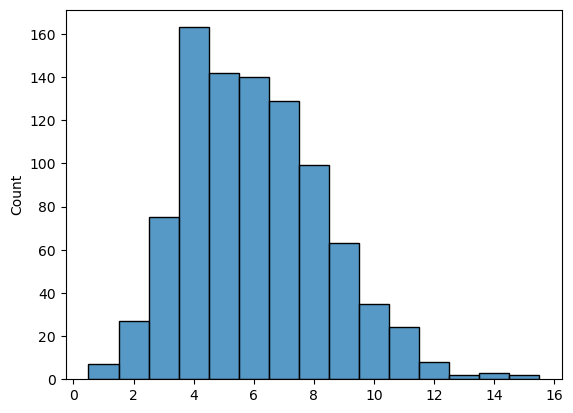

In [7]:
#I used seaborn first 
sns_plot = sns.histplot(len_words, discrete=True)
fig = sns_plot.get_figure()

Text(0, 0.5, 'Frequency')

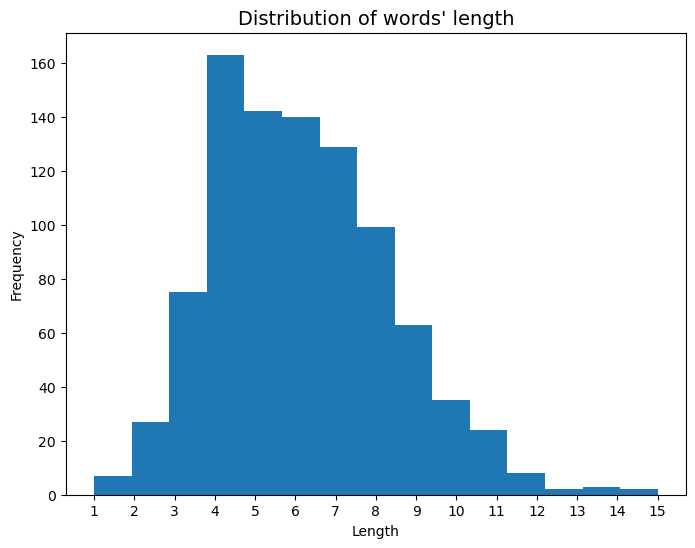

In [8]:
#but I couldn't find a way to add labels to axes without changing the data
#So I also used Matplotlib for sure

plt.figure(figsize=(8,6))
plt.hist(len_words, bins = 15)
plt.xticks(range(1,16))
plt.title('Distribution of words\' length' , size = 14)
plt.xlabel('Length')
plt.ylabel('Frequency')

6. Make a translator function from Russian to "brick language"

In [9]:
def Translator(rus_str):
    sonorn = 'АаЕеЁёИиОоУуЭэЫыЮюЯя'
    for i in sonorn:
        rus_str = re.sub(f'{i}', f'{i}К{i.upper()}', rus_str)
    return rus_str

In [10]:
Translator('~Нам пора отпустить синиц, нам пора ловить журавлей')

'~НаКАм поКОраКА оКОтпуКУстиКИть сиКИниКИц, наКАм поКОраКА лоКОвиКИть жуКУраКАвлеКЕй'